# Evaluation of VAE LSTM Network in Anomaly Detection

Code by Thinh Hoang (dthoang@artimensium.com) from the original paper.

**What's the difference?** In this notebook, we use VAE to sample **multiple points** instead of just one.

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from arch_skip import VAE_LSTM_Model
from config import train_configurations
model = VAE_LSTM_Model(train_configurations)

In [4]:
# Load the weights of the VAE
model.load_vae_weights('../vae_weights.pth')

In [5]:
# Load the weights of the LSTM
model.load_lstm_weights('../lstm_weights.pth')

# Let's Test. Hopefully it will work, otherwise my paper is delayed again :(

In [6]:
# Append NGSIM folder to the search path
from ngsim_lstm_dataset import NGSIM_PreEmbeddings_Dataset

ngsim_pee_ds = NGSIM_PreEmbeddings_Dataset(unroll_filepath='../NGSIM_Dataset/unrolled_data.npy',
                                   bond_filepath='../NGSIM_Dataset/bond_data.pkl',
                                   column=3) # velocity
print(f'Dataset loaded. Shape: {ngsim_pee_ds.unrolled_data.shape}')

Dataset loaded. Shape: (23400, 1, 32)


Expected velocity:  39.5653125
Expected velocity:  38.60624999999999


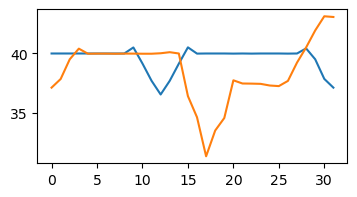

In [21]:
# Let's plot the first sequence
import matplotlib.pyplot as plt
import numpy as np

seq1 = ngsim_pee_ds.unrolled_data[0]
print('Expected velocity: ', np.mean(seq1.flatten()))
seq2 = ngsim_pee_ds.unrolled_data[31]
print('Expected velocity: ', np.mean(seq2.flatten()))
plt.figure(figsize=(4,2))
plt.plot(seq1.flatten())
plt.plot(seq2.flatten())

In [22]:
# We can cumsum the first sequence
x1 = np.cumsum(seq1.flatten())
x2 = np.cumsum(seq2.flatten())

In [45]:
seq_sampled = model.predict_sequence_monte_carlo(seq1, 100)
seq_sampled = np.squeeze(seq_sampled, axis=1)
seq_sampled = np.squeeze(seq_sampled, axis=1)

emb_mu: tensor([[ 1.2715e+00,  2.7032e-01,  1.7042e+02, -7.4513e-03,  2.3613e-01,
         -2.1669e+00]])
emb_lvar: tensor([[ -3.4813,  -4.5200, -69.2848,  -3.9406,  -3.3150,  -4.3259]])


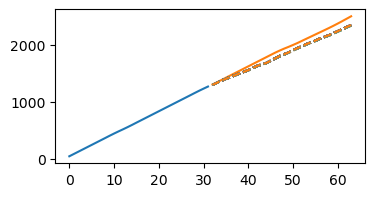

In [46]:
plt.figure(figsize=(4,2))
plt.plot(np.arange(len(x1)), x1)
plt.plot(np.arange(len(x2)) + len(x1), x2 + x1[-1])
for i in range(100):
    plt.plot(np.arange(len(seq_sampled[i])) + len(x1), np.cumsum(seq_sampled[i,:].flatten()) + x1[-1], linestyle='--')

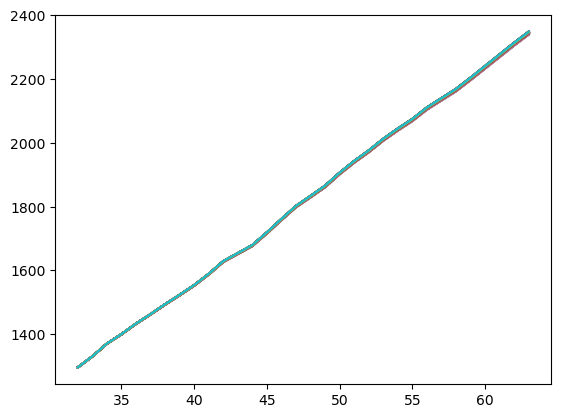

In [43]:
for i in range(100):
    plt.plot(np.arange(len(seq_sampled[i])) + len(x1), np.cumsum(seq_sampled[i,:].flatten()) + x1[-1])

In [34]:
x2.shape

(32,)